<a href="https://colab.research.google.com/github/taliyameyswara/sleep-disorder-app/blob/main/shl_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **😴🛌 Prediksi Sleep Disorder dengan Naive Bayes Gaussian 😴🛌**  
Dalam projek ini, kita akan memprediksi apakah seseorang memiliki sleep disorder berdasarkan berbagai faktor kesehatan dan kebiasaan menggunakan algoritma **Naive Bayes Gaussian**.  

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **🎯 Overview Dataset**
Dataset ini berisi informasi tentang individu, termasuk fitur-fitur yang terkait dengan kesehatan, kebiasaan, dan pola tidur mereka. Berikut adalah overviewnya:

In [2]:
df = pd.read_csv("/content/shl_dataset.csv", delimiter=";")
df.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Systolic Blood Pressure,Diatolic Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,6.1,6,42,6,2,126,83,77,4200,NaN
1,2,1,28,6.2,6,60,8,1,125,80,75,10000,NaN
2,3,1,28,6.2,6,60,8,1,125,80,75,10000,NaN
3,4,1,28,5.9,4,30,8,3,140,90,85,3000,Sleep Apnea
4,5,1,28,5.9,4,30,8,3,140,90,85,3000,Sleep Apnea


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    int64  
 2   Age                      374 non-null    int64  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Systolic Blood Pressure  374 non-null    int64  
 9   Diatolic Blood Pressure  374 non-null    int64  
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(10), object(2)
memory usage: 38.1+ KB


In [4]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Systolic Blood Pressure,0
Diatolic Blood Pressure,0


## **🛠️ Preprocessing Data**
Sebelum melakukan prediksi menggunakan algoritma Naive Bayes Gaussian, kita perlu mempersiapkan dan membersihkan data terlebih dahulu. Berikut adalah langkah-langkah preprocessing yang dilakukan:

In [5]:
# menghapus atribut Person ID

df.drop('Person ID', axis=1, inplace=True)

In [6]:
# mengubah missing value pada atribut 'Sleep Atribut' menjadi 'None'

df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [7]:
df.isnull().sum()

,0
Gender,0
Age,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Systolic Blood Pressure,0
Diatolic Blood Pressure,0
Heart Rate,0


In [8]:
print(df['BMI Category'].unique())

['2' '1' '3' '1 Weight']


In [9]:
df['BMI Category'] = df['BMI Category'].replace('1 Weight', '1')

In [10]:
df['BMI Category'] = df['BMI Category'].replace({
    '1': 1,
    '2': 2,
    '3': 3
})

In [11]:
print(df['BMI Category'].unique())

[2 1 3]


## **📊 Visualisasi Data**
Visualisasi data merupakan langkah penting dalam eksplorasi data untuk memahami distribusi, hubungan antar fitur, dan mendeteksi pola yang mungkin tidak terlihat langsung dari angka-angka mentah. Berikut adalah beberapa jenis visualisasi yang digunakan dalam proyek ini:

<Axes: xlabel='Sleep Disorder', ylabel='count'>

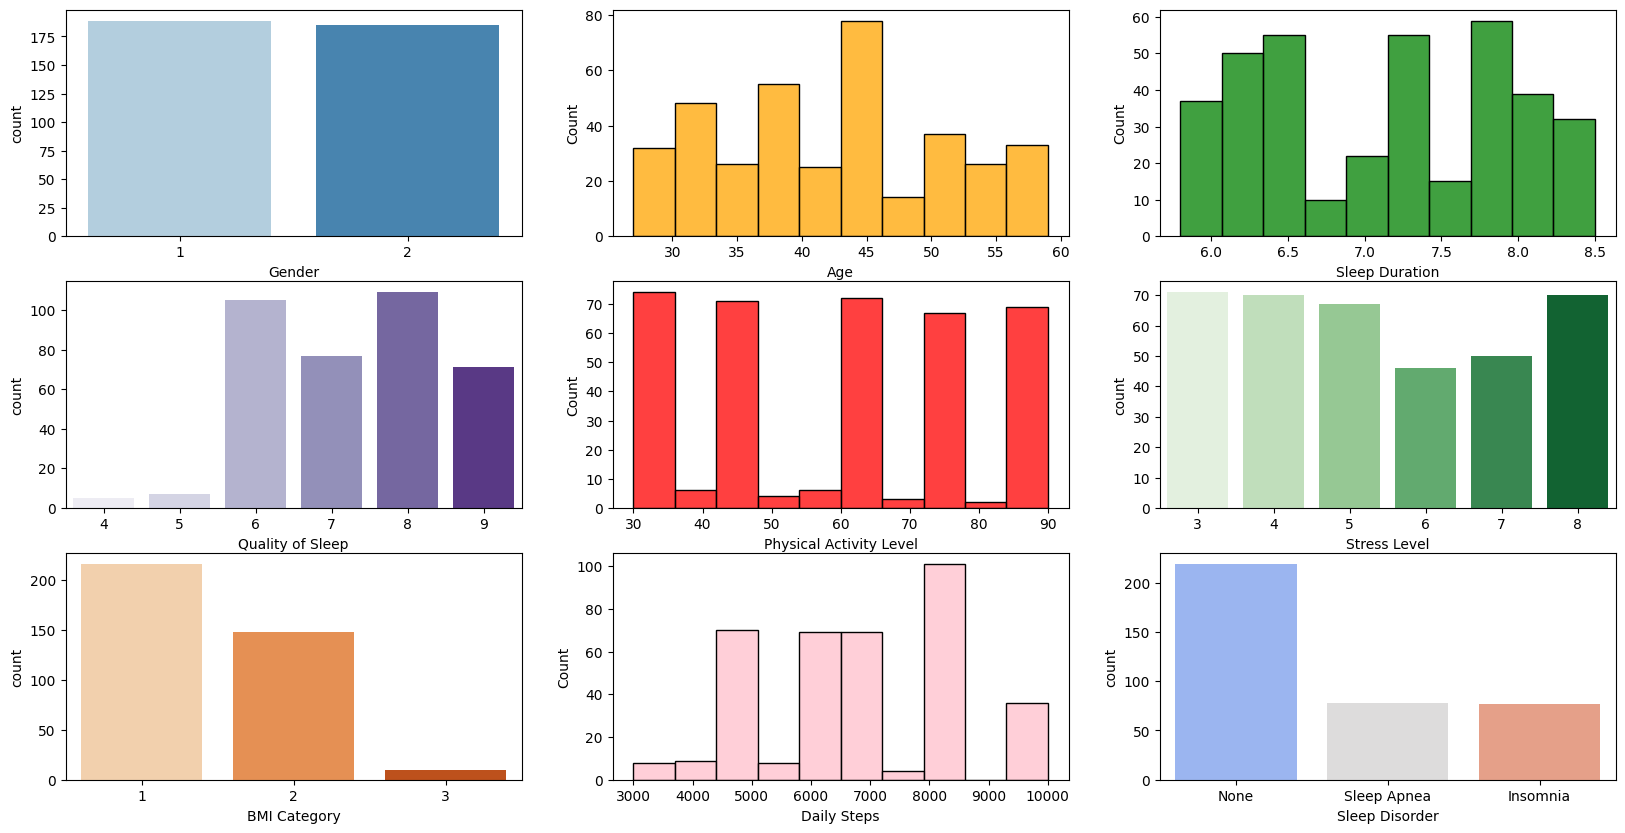

In [12]:
fig,ax = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x="Gender", data=df, ax=ax[0, 0], palette="Blues")
sns.histplot(x="Age", data=df, ax=ax[0, 1], bins=10, color="orange")
sns.histplot(x="Sleep Duration", data=df, ax=ax[0, 2], bins=10, color="green")
sns.countplot(x="Quality of Sleep", data=df, ax=ax[1, 0], palette="Purples")
sns.histplot(x="Physical Activity Level", data=df, ax=ax[1, 1], bins=10, color="red")
sns.countplot(x="Stress Level", data=df, ax=ax[1, 2], palette="Greens")
sns.countplot(x="BMI Category", data=df, ax=ax[2, 0], palette="Oranges")
sns.histplot(x="Daily Steps", data=df, ax=ax[2, 1], bins=10, color="pink")
sns.countplot(x="Sleep Disorder", data=df, ax=ax[2, 2], palette="coolwarm")


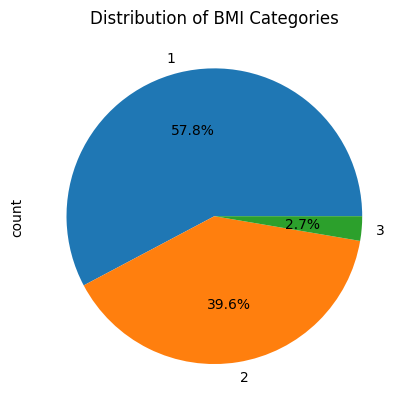

In [13]:
df['BMI Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of BMI Categories');

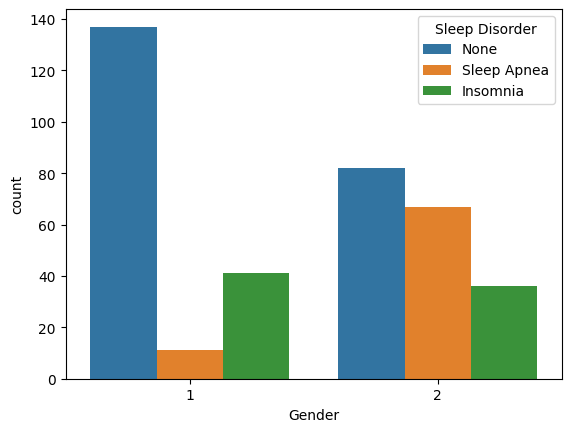

In [14]:
sns.countplot(x=df['Gender'],hue=df['Sleep Disorder']);

## **🔍 Uji Korelasi**
Uji korelasi digunakan untuk memahami hubungan antara dua variabel atau lebih dalam dataset. Dalam proyek ini, kita akan mengevaluasi korelasi antara berbagai fitur untuk melihat apakah ada hubungan signifikan yang bisa mempengaruhi prediksi sleep disorder.

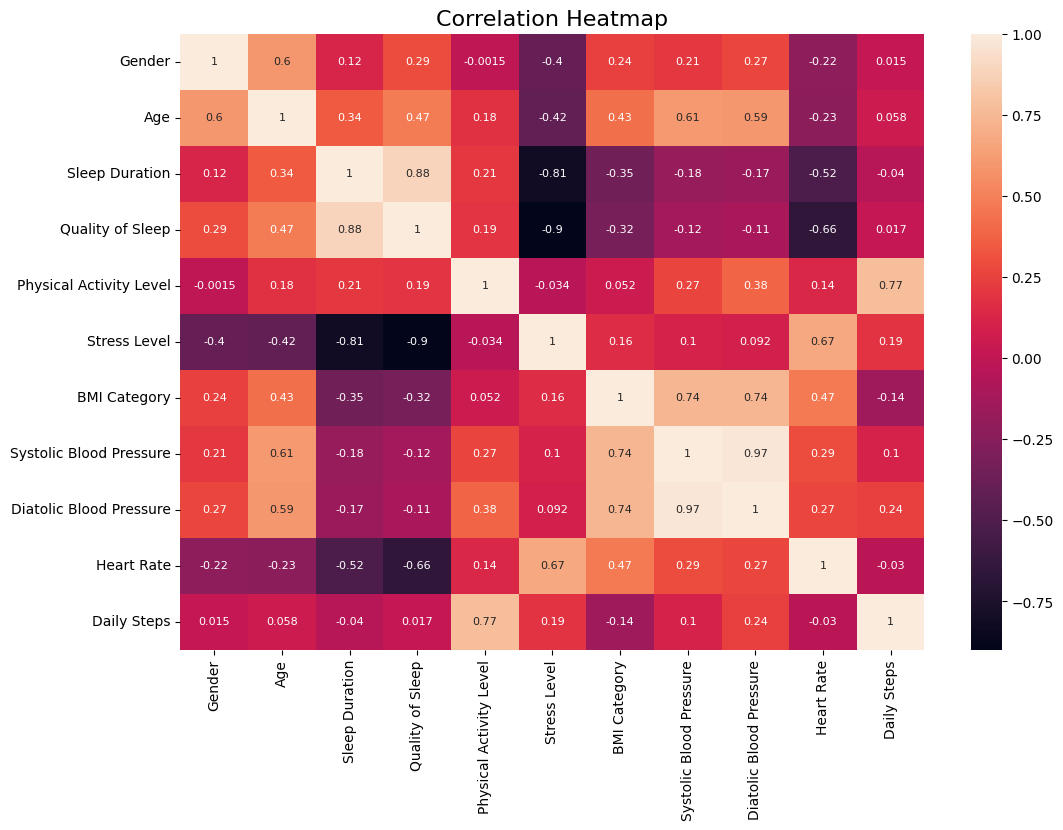

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    annot_kws={"size": 8},
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [16]:
x=df.drop('Sleep Disorder',axis=1)
y=df[['Sleep Disorder']]

In [17]:
x=pd.get_dummies(x,drop_first=True)

In [18]:
x.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Systolic Blood Pressure,Diatolic Blood Pressure,Heart Rate,Daily Steps
0,1,27,6.1,6,42,6,2,126,83,77,4200
1,1,28,6.2,6,60,8,1,125,80,75,10000
2,1,28,6.2,6,60,8,1,125,80,75,10000
3,1,28,5.9,4,30,8,3,140,90,85,3000
4,1,28,5.9,4,30,8,3,140,90,85,3000


In [19]:
y.head()

,Sleep Disorder
0,None
1,None
2,None
3,Sleep Apnea
4,Sleep Apnea


## **🔀 Splitting Data**
Dalam projek ini, kita akan membagi dataset menjadi dua bagian utama: **data latih (training data)** dan **data uji (testing data)**.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [21]:
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## **🧑‍💻 Pembuatan Model (Modeling)**
Setelah membagi data menjadi data latih dan data uji, langkah selanjutnya adalah membangun dan melatih model. Dalam proyek ini, kita akan menggunakan algoritma **Naive Bayes Gaussian** untuk memprediksi apakah seseorang mengalami gangguan tidur. Algoritma ini cocok untuk klasifikasi dengan asumsi bahwa fitur-fitur dalam data saling independen dan mengikuti distribusi normal (Gaussian).

In [22]:
model = GaussianNB()

In [23]:
train_data = model.fit(x_train, y_train)

## **🔍 Validasi Model**
Setelah kita melatih model, langkah selanjutnya adalah memvalidasi kinerjanya untuk memastikan bahwa model yang dibangun dapat memprediksi dengan baik pada data yang tidak terlihat sebelumnya. Proses validasi ini penting untuk menghindari overfitting, yaitu ketika model bekerja sangat baik pada data latih, tetapi buruk pada data uji.

In [24]:
y_pred = train_data.predict(x_test)
y_pred

array(['None', 'None', 'None', 'None', 'None', 'Insomnia', 'None', 'None',
       'None', 'None', 'Insomnia', 'None', 'None', 'None', 'None',
       'Sleep Apnea', 'Insomnia', 'Insomnia', 'None', 'None', 'None',
       'None', 'None', 'Insomnia', 'Insomnia', 'None', 'Insomnia',
       'Insomnia', 'Insomnia', 'Sleep Apnea', 'None', 'None', 'None',
       'Sleep Apnea', 'Sleep Apnea', 'None', 'None', 'None', 'None',
       'None', 'Insomnia', 'Sleep Apnea', 'Insomnia', 'Insomnia', 'None',
       'None', 'None', 'None', 'Sleep Apnea', 'None', 'Sleep Apnea',
       'Insomnia', 'Sleep Apnea', 'None', 'Insomnia', 'Sleep Apnea',
       'Insomnia', 'Sleep Apnea', 'Sleep Apnea', 'None', 'None',
       'Insomnia', 'None', 'None', 'Insomnia', 'None', 'Insomnia', 'None',
       'None', 'Insomnia', 'None', 'Insomnia', 'None', 'Sleep Apnea',
       'Sleep Apnea'], dtype='<U11')

In [25]:
accuracy_score(y_test,y_pred)

0.8533333333333334

Text(0.5, 23.52222222222222, 'Predicted')

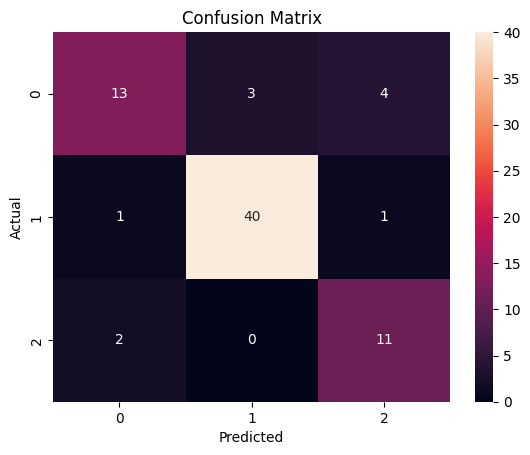

In [26]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True);
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')


In [27]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Insomnia       0.81      0.65      0.72        20
        None       0.93      0.95      0.94        42
 Sleep Apnea       0.69      0.85      0.76        13

    accuracy                           0.85        75
   macro avg       0.81      0.82      0.81        75
weighted avg       0.86      0.85      0.85        75



In [28]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

# Manually inputted data
manual_input = {
    'Gender': 1,
    'Age': 28,
    'Sleep Duration': 5.9,
    'Quality of Sleep': 6,
    'Physical Activity Level': 30,
    'Stress Level': 8,
    'BMI Category': 1,
    'Systolic Blood Pressure': 140,
    'Diastolic Blood Pressure': 90,
    'Heart Rate': 90,
    'Daily Steps': 3000
}

# Prepare the input data for prediction (turn the dictionary into a 2D array)
input_data = np.array([[
    manual_input['Gender'],
    manual_input['Age'],
    manual_input['Sleep Duration'],
    manual_input['Quality of Sleep'],
    manual_input['Physical Activity Level'],
    manual_input['Stress Level'],
    manual_input['BMI Category'],
    manual_input['Systolic Blood Pressure'],
    manual_input['Diastolic Blood Pressure'],
    manual_input['Heart Rate'],
    manual_input['Daily Steps']
]])

prediction = model.predict(input_data)
print(f"The predicted sleep disorder for the input data is: {prediction[0]}")


The predicted sleep disorder for the input data is: Insomnia


## **Save Model 💿**

In [29]:
import joblib

joblib.dump(model, 'shl_model.pkl')

['shl_model.pkl']